In [27]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd 

#this is sample data
from nltk.corpus import names  

from string import punctuation

In [28]:
import pandas as pd

data = pd.read_csv (r'women_clothing_review.csv')
df1 = pd.DataFrame(data, columns= ['Review Text'])
print (datar)
    
    

                                             Review Text
0      Absolutely wonderful - silky and sexy and comf...
1      Love this dress!  it's sooo pretty.  i happene...
2      I had such high hopes for this dress and reall...
3      I love, love, love this jumpsuit. it's fun, fl...
4      This shirt is very flattering to all due to th...
...                                                  ...
23481  I was very happy to snag this dress at such a ...
23482  It reminds me of maternity clothes. soft, stre...
23483  This fit well, but the top was very see throug...
23484  I bought this dress for a wedding i have this ...
23485  This dress in a lovely platinum is feminine an...

[23486 rows x 1 columns]


In [29]:
df1.isnull().sum() 

Review Text    845
dtype: int64

In [30]:
df2 =df1.dropna()

In [31]:
df2.head(3)

,Review Text
0,Absolutely wonderful - silky and sexy and comf...
1,Love this dress! it's sooo pretty. i happene...
2,I had such high hopes for this dress and reall...


In [32]:
df2.shape

(22641, 1)

In [33]:
#initilize function to do sentiment analysis
sid = SentimentIntensityAnalyzer()

In [34]:
eng_stopwords = stopwords.words('english')
eng_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [35]:
#create a function to clean up each review
#then it will analyze and assign a sentiment polarity
def reviewSentiment(review):
    
    #make text lowercase
    review = review.lower()
    
    #tokenize the review
    tknz_review = word_tokenize(review)
    
    #remove puntuation
    for token in tknz_review:
        if token in punctuation:
            tknz_review.remove(token)
    
    #empty list to hold "cleaned" tokens
    clean_tokens = []
    
    #remove filler words
    for token in tknz_review:
        if token not in eng_stopwords:
            clean_tokens.append(token)
            
    #put sentence back together with remaining clean words
    clean_review = ' '.join(clean_tokens)
    
    #get the polarity scores dictionary
    sid_rev = sid.polarity_scores(clean_review)
    
    #get sentiment polarity from the "compound" key in the sid_rev dictionary
    r_comp = sid_rev['compound']
    
    #return the sentiment value
    return r_comp

In [36]:
#create a new column to hold sentiment value from function
df2['reviewSentiment'] = df2['Review Text'].apply(reviewSentiment)

C:\Users\yohan\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [37]:
df2.head()


,Review Text,reviewSentiment
0,Absolutely wonderful - silky and sexy and comf...,0.8991
1,Love this dress! it's sooo pretty. i happene...,0.9710
2,I had such high hopes for this dress and reall...,0.9062
3,"I love, love, love this jumpsuit. it's fun, fl...",0.9464
4,This shirt is very flattering to all due to th...,0.9117


In [38]:
#create a function to assign a polarity category to the sentiment
def sentimentCategory(sent_num):
    if sent_num >= 0.2:
        return "positive"
    if sent_num <= -0.2:
        return "negative"
    else:
        return "neutral"

In [40]:
#create a new column to hold sentiment category
df2['sentiment_category'] = df2['reviewSentiment'].apply(sentimentCategory)

C:\Users\yohan\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [41]:
df2.head()

,Review Text,reviewSentiment,sentiment_category
0,Absolutely wonderful - silky and sexy and comf...,0.8991,positive
1,Love this dress! it's sooo pretty. i happene...,0.9710,positive
2,I had such high hopes for this dress and reall...,0.9062,positive
3,"I love, love, love this jumpsuit. it's fun, fl...",0.9464,positive
4,This shirt is very flattering to all due to th...,0.9117,positive


In [42]:
def wordcloud(text,my_mask=None):
    wordcloud = WordCloud(width=800,height=800,max_words=50,collocations=False,
    min_font_size=10,contour_width=2, contour_color='cadetblue',mask=my_mask,background_color='white').generate(text)

    plt.imshow(wordcloud,interpolation="bilinear")
    plt.axis('off')
    plt.show()

def tokenize(text):
    
    stop_words = set(stopwords.words('english'))
    
    token =word_tokenize(text)
    
    word_token = []

    for w in token:
        if w not in stop_words and not w.isdigit() and w.isalnum() :
            word_token.append(str(w))
    
    freq = nltk.FreqDist(word_token)

    new_list = []
    for k,v in freq.items():
        if v >= 2:
            new_list.append(k)
    
    freq.plot(10,cumulative=False)
    plt.show()
    return (str(new_list))

In [44]:
#compare frequency of positive, negative, and neutral reviews
df2['sentiment_category'].value_counts()

positive    21380
neutral       717
negative      544
Name: sentiment_category, dtype: int64

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#import plotly.offline as pyo
#import plotly.graph_objs as go
#import plotly.express as px
%matplotlib inline

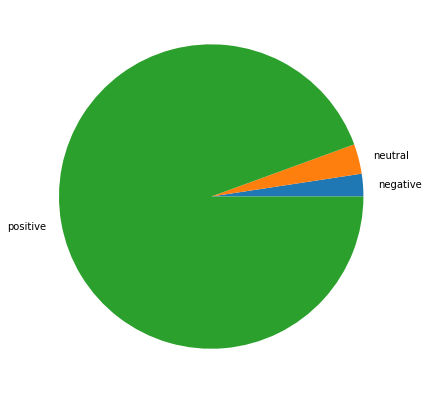

In [50]:
%matplotlib inline
fig = plt.figure(figsize=(7,7))
#add colors
#colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
#colors = ['#ff9999','#66b3ff','#99ff99']
df2.groupby(['sentiment_category']).size().plot.pie(label="")
